In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
df1= pd.read_excel('after_EDA_final.xlsx')

In [3]:
df=df1.copy()

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
pd.set_option('display.max_rows', None)

In [6]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           1   2126.466667         180000       SRI LANKA            NORM   
2           2   7828.763333          50000       SRI LANKA            NORM   
3           3   1276.666667          24000       SRI LANKA            NORM   
4           4  20623.063333          42000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000055003            0             N   
2            0  4157380000060029            0             N   
3            0  4157380000066018            0             N   
4            0  4157380000072008            0             N   

  CR_EXPIRYDATESTATUS CR_CARD_STATUS  CR_CARD_MIN_AMT_DUE  \
0                   A           NORM               500.00   
1                   A           NORM              1269.55   
2                   A           NORM                 0.00   
3                   A           NORM                 0.00   
4                   A           NORM                 0.00   

  CR_CARD_OVERDUE_STATUS CR_CARD_CUSTITLE CR_CARD_CUSGENDER CR_CARD_CUSMARI  \
0                      G               MR                 M               M   
1                      G               MS                 F               M   
2                      G               MR                 M               M   
3                      G               MR                 M               M   
4                      G               MR                 M               M   

   CR_CARD_AMTARRS CR_STANDORD_VALUE  CR_BANKDDAMOUNT       AVG_PAY  \
0              0.0                 0              0.0   1000.000000   
1              0.0                 0              0.0   6666.666667   
2              0.0                 0              0.0  84950.000000   
3              0.0                 0              0.0   2000.000000   
4              0.0                 0              0.0  32200.000000   

      AVG_BALOS  NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0  12486.126667                 1               0                    0.0   
1  15969.986667                 1               0                    0.0   
2   2287.676667                 1               0                    0.0   
3  20851.670000                 1               0                    0.0   
4  33576.010000                 1               0                    0.0   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                  -67.06              0.0                  0.0   
1                  549.07              0.0                  0.0   
2                   13.70              0.0                  0.0   
3                  812.40              0.0                  0.0   
4                  148.78              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE     NII   AGE     CC_AGE  \
0               0               0.0  -67.06  80.0  26.083333   
1               2          125000.0  409.07  52.0  26.000000   
2               4               0.0   13.70  63.0  26.000000   
3               0               0.0  812.40  61.0  26.000000   
4               3               0.0  128.78  56.0  25.916667   

   CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                   3                        0.00                    0   
1                   2                    55461.72                    0   
2                   0                        0.00                    0   
3                   1                    47205.46                    0   
4                   1                   170194.41                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0               1.181370    4

In [7]:
df.shape

(66757, 38)

In [8]:
df.head()

Unnamed: 0   AVG_UTILIZE  CR_CARD_LIMIT CR_CARD_CUSCOUN CR_CARD_CSTATUS  \
0           0   1756.446667          20000       SRI LANKA            NORM   
1           1   2126.466667         180000       SRI LANKA            NORM   
2           2   7828.763333          50000       SRI LANKA            NORM   
3           3   1276.666667          24000       SRI LANKA            NORM   
4           4  20623.063333          42000       SRI LANKA            NORM   

   CR_CARD_VIP   STR_CR_CARD_NUM  CR_CARD_ARR CR_CARD_STAFF  \
0            0  4157380000039007            0             N   
1            0  4157380000055003            0             N   
2            0  4157380000060029            0             N   
3            0  4157380000066018            0             N   
4            0  4157380000072008            0             N   

  CR_EXPIRYDATESTATUS CR_CARD_STATUS  CR_CARD_MIN_AMT_DUE  \
0                   A           NORM               500.00   
1                   A           NORM              1269.55   
2                   A           NORM                 0.00   
3                   A           NORM                 0.00   
4                   A           NORM                 0.00   

  CR_CARD_OVERDUE_STATUS CR_CARD_CUSTITLE CR_CARD_CUSGENDER CR_CARD_CUSMARI  \
0                      G               MR                 M               M   
1                      G               MS                 F               M   
2                      G               MR                 M               M   
3                      G               MR                 M               M   
4                      G               MR                 M               M   

   CR_CARD_AMTARRS CR_STANDORD_VALUE  CR_BANKDDAMOUNT       AVG_PAY  \
0              0.0                 0              0.0   1000.000000   
1              0.0                 0              0.0   6666.666667   
2              0.0                 0              0.0  84950.000000   
3              0.0                 0              0.0   2000.000000   
4              0.0                 0              0.0  32200.000000   

      AVG_BALOS  NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0  12486.126667                 1               0                    0.0   
1  15969.986667                 1               0                    0.0   
2   2287.676667                 1               0                    0.0   
3  20851.670000                 1               0                    0.0   
4  33576.010000                 1               0                    0.0   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                  -67.06              0.0                  0.0   
1                  549.07              0.0                  0.0   
2                   13.70              0.0                  0.0   
3                  812.40              0.0                  0.0   
4                  148.78              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE     NII   AGE     CC_AGE  \
0               0               0.0  -67.06  80.0  26.083333   
1               2          125000.0  409.07  52.0  26.000000   
2               4               0.0   13.70  63.0  26.000000   
3               0               0.0  812.40  61.0  26.000000   
4               3               0.0  128.78  56.0  25.916667   

   CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                   3                        0.00                    0   
1                   2                    55461.72                    0   
2                   0                        0.00                    0   
3                   1                    47205.46                    0   
4                   1                   170194.41                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0               1.181370    4

In [9]:
# Drop the specified columns
df.drop(columns=[ 'NII'], inplace=True)

In [10]:
df.shape

(66757, 37)

In [11]:
df.drop(columns=[ 'AVG_UTILIZE','AVG_BALOS','CR_CARD_LIMIT','AVG_PAY'], inplace=True)

In [12]:
df.shape

(66757, 33)

In [13]:
df.dtypes

Unnamed: 0                       int64
CR_CARD_CUSCOUN                 object
CR_CARD_CSTATUS                 object
CR_CARD_VIP                      int64
STR_CR_CARD_NUM                  int64
CR_CARD_ARR                      int64
CR_CARD_STAFF                   object
CR_EXPIRYDATESTATUS             object
CR_CARD_STATUS                  object
CR_CARD_MIN_AMT_DUE            float64
CR_CARD_OVERDUE_STATUS          object
CR_CARD_CUSTITLE                object
CR_CARD_CUSGENDER               object
CR_CARD_CUSMARI                 object
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE               object
CR_BANKDDAMOUNT                float64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
HOMELOAN_AMOUNT                float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE               float64
AGE                      

In [14]:
df.shape

(66757, 33)

In [15]:
df.isna().sum()

Unnamed: 0                     0
CR_CARD_CUSCOUN                0
CR_CARD_CSTATUS                0
CR_CARD_VIP                    0
STR_CR_CARD_NUM                0
CR_CARD_ARR                    0
CR_CARD_STAFF                  0
CR_EXPIRYDATESTATUS            0
CR_CARD_STATUS                 0
CR_CARD_MIN_AMT_DUE            0
CR_CARD_OVERDUE_STATUS         0
CR_CARD_CUSTITLE               0
CR_CARD_CUSGENDER              0
CR_CARD_CUSMARI                0
CR_CARD_AMTARRS                0
CR_STANDORD_VALUE              0
CR_BANKDDAMOUNT                0
NO_ACCOUNTS_CARD               0
NO_ACCOUNTS_OD                 0
THREE_MONTH_BAL_OS_OD          0
CUSTOMER_PROFITABILITY         0
HOMELOAN_AMOUNT                0
PERSONALLOAN_AMOUNT            0
NO_DEBIT_CARDS                 0
DEBIT_CARD_USAGE               0
AGE                            0
CC_AGE                         0
CUSTOMER_DEBIT_ACC             0
CUSTOMER_DEBIT_ACC_BALANCE     0
CUSTOMER_CREDIT_ACC            0
CUSTOMER_C

#### LABEL ENCODING

In [16]:
def cus_country(x):
    
    if (x =='SRI LANKA'):
        return 0
    
    else:
        return 1



df['CR_CARD_CUSCOUN']=df['CR_CARD_CUSCOUN'].apply(cus_country)

In [17]:
def cus_over(x):
    
    if (x =='B'):
        return 0
    
    else:
        return 1



df['CR_CARD_OVERDUE_STATUS']=df['CR_CARD_OVERDUE_STATUS'].apply(cus_over)

In [18]:
def cus_country(x):
    
    if (x =='F'):
        return 0
    
    else:
        return 1



df['CR_CARD_CUSGENDER']=df['CR_CARD_CUSGENDER'].apply(cus_country)

In [19]:
def married_status(x):
    
    if (x =='S'):
        return 1
    
    elif (x =='M'):
        return 2
    
    elif (x =='D'):
        return 3
    
    elif (x =='W'):
        return 4
    
    else:
        return 5



df['CR_CARD_CUSMARI']=df['CR_CARD_CUSMARI'].apply(married_status)

In [20]:
def title(x):
    
    if (x =='MR'):
        return 1
    
    elif (x =='MRS'):
        return 2
    
    elif (x =='MISS'):
        return 3
    
    elif (x =='DR'):
        return 4
    
    elif (x =='DR MRS'):
        return 4
    
    elif (x =='MS'):
        return 5
    
    elif (x =='REV'):
        return 6
    
    elif (x =='PROF'):
        return 7
    
    elif (x =='CAPT.'):
        return 8
    
    elif (x =='MAJOR'):
        return 9
    
    else:
        return 10



df['CR_CARD_CUSTITLE']=df['CR_CARD_CUSTITLE'].apply(title)

In [21]:
df.head()

Unnamed: 0  CR_CARD_CUSCOUN CR_CARD_CSTATUS  CR_CARD_VIP   STR_CR_CARD_NUM  \
0           0                0            NORM            0  4157380000039007   
1           1                0            NORM            0  4157380000055003   
2           2                0            NORM            0  4157380000060029   
3           3                0            NORM            0  4157380000066018   
4           4                0            NORM            0  4157380000072008   

   CR_CARD_ARR CR_CARD_STAFF CR_EXPIRYDATESTATUS CR_CARD_STATUS  \
0            0             N                   A           NORM   
1            0             N                   A           NORM   
2            0             N                   A           NORM   
3            0             N                   A           NORM   
4            0             N                   A           NORM   

   CR_CARD_MIN_AMT_DUE  CR_CARD_OVERDUE_STATUS  CR_CARD_CUSTITLE  \
0               500.00                       1                 1   
1              1269.55                       1                 5   
2                 0.00                       1                 1   
3                 0.00                       1                 1   
4                 0.00                       1                 1   

   CR_CARD_CUSGENDER  CR_CARD_CUSMARI  CR_CARD_AMTARRS CR_STANDORD_VALUE  \
0                  1                2              0.0                 0   
1                  0                2              0.0                 0   
2                  1                2              0.0                 0   
3                  1                2              0.0                 0   
4                  1                2              0.0                 0   

   CR_BANKDDAMOUNT  NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0              0.0                 1               0                    0.0   
1              0.0                 1               0                    0.0   
2              0.0                 1               0                    0.0   
3              0.0                 1               0                    0.0   
4              0.0                 1               0                    0.0   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                  -67.06              0.0                  0.0   
1                  549.07              0.0                  0.0   
2                   13.70              0.0                  0.0   
3                  812.40              0.0                  0.0   
4                  148.78              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE   AGE     CC_AGE  CUSTOMER_DEBIT_ACC  \
0               0               0.0  80.0  26.083333                   3   
1               2          125000.0  52.0  26.000000                   2   
2               4               0.0  63.0  26.000000                   0   
3               0               0.0  61.0  26.000000                   1   
4               3               0.0  56.0  25.916667                   1   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                        0.00                    0   
1                    55461.72                    0   
2                        0.00                    0   
3                    47205.46                    0   
4                   170194.41                    0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               8.782233     8.008889  
1                          0.0               1.181370    41.744973  
2                          0.0              15.657527  3713.374413  
3                          0.0               5.319444     9.591558  
4                          0.0              49.102532    95.901806

In [22]:
df.dtypes

Unnamed: 0                       int64
CR_CARD_CUSCOUN                  int64
CR_CARD_CSTATUS                 object
CR_CARD_VIP                      int64
STR_CR_CARD_NUM                  int64
CR_CARD_ARR                      int64
CR_CARD_STAFF                   object
CR_EXPIRYDATESTATUS             object
CR_CARD_STATUS                  object
CR_CARD_MIN_AMT_DUE            float64
CR_CARD_OVERDUE_STATUS           int64
CR_CARD_CUSTITLE                 int64
CR_CARD_CUSGENDER                int64
CR_CARD_CUSMARI                  int64
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE               object
CR_BANKDDAMOUNT                float64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
HOMELOAN_AMOUNT                float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE               float64
AGE                      

In [23]:
# Convert 'CR_STANDORD_VALUE' column to string type
df['CR_STANDORD_VALUE'] = df['CR_STANDORD_VALUE'].astype(str)

# Remove commas from 'CR_STANDORD_VALUE' column
df['CR_STANDORD_VALUE'] = df['CR_STANDORD_VALUE'].str.replace(',', '')

# Convert 'CR_STANDORD_VALUE' column to float
df['CR_STANDORD_VALUE'] = df['CR_STANDORD_VALUE'].astype(float)


In [24]:
df.dtypes

Unnamed: 0                       int64
CR_CARD_CUSCOUN                  int64
CR_CARD_CSTATUS                 object
CR_CARD_VIP                      int64
STR_CR_CARD_NUM                  int64
CR_CARD_ARR                      int64
CR_CARD_STAFF                   object
CR_EXPIRYDATESTATUS             object
CR_CARD_STATUS                  object
CR_CARD_MIN_AMT_DUE            float64
CR_CARD_OVERDUE_STATUS           int64
CR_CARD_CUSTITLE                 int64
CR_CARD_CUSGENDER                int64
CR_CARD_CUSMARI                  int64
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE              float64
CR_BANKDDAMOUNT                float64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
HOMELOAN_AMOUNT                float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE               float64
AGE                      

In [25]:
df_encode= pd.get_dummies(df, columns=['CR_CARD_CUSMARI'],drop_first=True)


In [26]:
df_encode= pd.get_dummies(df_encode, columns=['CR_CARD_CUSTITLE'],drop_first=True)


In [27]:
df_encode.shape

(66757, 44)

In [28]:
df_encode.head()

Unnamed: 0  CR_CARD_CUSCOUN CR_CARD_CSTATUS  CR_CARD_VIP   STR_CR_CARD_NUM  \
0           0                0            NORM            0  4157380000039007   
1           1                0            NORM            0  4157380000055003   
2           2                0            NORM            0  4157380000060029   
3           3                0            NORM            0  4157380000066018   
4           4                0            NORM            0  4157380000072008   

   CR_CARD_ARR CR_CARD_STAFF CR_EXPIRYDATESTATUS CR_CARD_STATUS  \
0            0             N                   A           NORM   
1            0             N                   A           NORM   
2            0             N                   A           NORM   
3            0             N                   A           NORM   
4            0             N                   A           NORM   

   CR_CARD_MIN_AMT_DUE  CR_CARD_OVERDUE_STATUS  CR_CARD_CUSGENDER  \
0               500.00                       1                  1   
1              1269.55                       1                  0   
2                 0.00                       1                  1   
3                 0.00                       1                  1   
4                 0.00                       1                  1   

   CR_CARD_AMTARRS  CR_STANDORD_VALUE  CR_BANKDDAMOUNT  NO_ACCOUNTS_CARD  \
0              0.0                0.0              0.0                 1   
1              0.0                0.0              0.0                 1   
2              0.0                0.0              0.0                 1   
3              0.0                0.0              0.0                 1   
4              0.0                0.0              0.0                 1   

   NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  CUSTOMER_PROFITABILITY  \
0               0                    0.0                  -67.06   
1               0                    0.0                  549.07   
2               0                    0.0                   13.70   
3               0                    0.0                  812.40   
4               0                    0.0                  148.78   

   HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  DEBIT_CARD_USAGE  \
0              0.0                  0.0               0               0.0   
1              0.0                  0.0               2          125000.0   
2              0.0                  0.0               4               0.0   
3              0.0                  0.0               0               0.0   
4              0.0                  0.0               3               0.0   

    AGE     CC_AGE  CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  \
0  80.0  26.083333                   3                        0.00   
1  52.0  26.000000                   2                    55461.72   
2  63.0  26.000000                   0                        0.00   
3  61.0  26.000000                   1                    47205.46   
4  56.0  25.916667                   1                   170194.41   

   CUSTOMER_CREDIT_ACC  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  \
0                    0                          0.0               8.782233   
1                    0                          0.0               1.181370   
2                    0                          0.0              15.657527   
3                    0                          0.0               5.319444   
4                    0                          0.0              49.102532   

   PAYMENT_AVG  CR_CARD_CUSMARI_2  CR_CARD_CUSMARI_3  CR_CARD_CUSMARI_4  \
0     8.008889               True              False              False   
1    41.744973               True              False              False   
2  3713.374413               True              False              False   
3     9.591558               True              False              False   
4    95.901806               True              False              False   

   CR_CARD_CUSMARI_5  CR_CAR

In [29]:
# Assuming df is your DataFrame after dummy encoding
df_encode['CR_CARD_CUSMARI_2'] = df_encode['CR_CARD_CUSMARI_2'].astype(int)
df_encode['CR_CARD_CUSMARI_3'] = df_encode['CR_CARD_CUSMARI_3'].astype(int)
df_encode['CR_CARD_CUSMARI_4'] = df_encode['CR_CARD_CUSMARI_4'].astype(int)
df_encode['CR_CARD_CUSMARI_5'] = df_encode['CR_CARD_CUSMARI_5'].astype(int)
df_encode['CR_CARD_CUSTITLE_2'] = df_encode['CR_CARD_CUSTITLE_2'].astype(int)
df_encode['CR_CARD_CUSTITLE_3'] = df_encode['CR_CARD_CUSTITLE_3'].astype(int)
df_encode['CR_CARD_CUSTITLE_4'] = df_encode['CR_CARD_CUSTITLE_4'].astype(int)
df_encode['CR_CARD_CUSTITLE_5'] = df_encode['CR_CARD_CUSTITLE_5'].astype(int)
df_encode['CR_CARD_CUSTITLE_6'] = df_encode['CR_CARD_CUSTITLE_6'].astype(int)
df_encode['CR_CARD_CUSTITLE_7'] = df_encode['CR_CARD_CUSTITLE_7'].astype(int)
df_encode['CR_CARD_CUSTITLE_8'] = df_encode['CR_CARD_CUSTITLE_8'].astype(int)
df_encode['CR_CARD_CUSTITLE_9'] = df_encode['CR_CARD_CUSTITLE_9'].astype(int)
df_encode['CR_CARD_CUSTITLE_10'] = df_encode['CR_CARD_CUSTITLE_10'].astype(int)

# Now, the columns will contain 0s and 1s instead of True and False


In [30]:
df_encode.head()

Unnamed: 0  CR_CARD_CUSCOUN CR_CARD_CSTATUS  CR_CARD_VIP   STR_CR_CARD_NUM  \
0           0                0            NORM            0  4157380000039007   
1           1                0            NORM            0  4157380000055003   
2           2                0            NORM            0  4157380000060029   
3           3                0            NORM            0  4157380000066018   
4           4                0            NORM            0  4157380000072008   

   CR_CARD_ARR CR_CARD_STAFF CR_EXPIRYDATESTATUS CR_CARD_STATUS  \
0            0             N                   A           NORM   
1            0             N                   A           NORM   
2            0             N                   A           NORM   
3            0             N                   A           NORM   
4            0             N                   A           NORM   

   CR_CARD_MIN_AMT_DUE  CR_CARD_OVERDUE_STATUS  CR_CARD_CUSGENDER  \
0               500.00                       1                  1   
1              1269.55                       1                  0   
2                 0.00                       1                  1   
3                 0.00                       1                  1   
4                 0.00                       1                  1   

   CR_CARD_AMTARRS  CR_STANDORD_VALUE  CR_BANKDDAMOUNT  NO_ACCOUNTS_CARD  \
0              0.0                0.0              0.0                 1   
1              0.0                0.0              0.0                 1   
2              0.0                0.0              0.0                 1   
3              0.0                0.0              0.0                 1   
4              0.0                0.0              0.0                 1   

   NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  CUSTOMER_PROFITABILITY  \
0               0                    0.0                  -67.06   
1               0                    0.0                  549.07   
2               0                    0.0                   13.70   
3               0                    0.0                  812.40   
4               0                    0.0                  148.78   

   HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  NO_DEBIT_CARDS  DEBIT_CARD_USAGE  \
0              0.0                  0.0               0               0.0   
1              0.0                  0.0               2          125000.0   
2              0.0                  0.0               4               0.0   
3              0.0                  0.0               0               0.0   
4              0.0                  0.0               3               0.0   

    AGE     CC_AGE  CUSTOMER_DEBIT_ACC  CUSTOMER_DEBIT_ACC_BALANCE  \
0  80.0  26.083333                   3                        0.00   
1  52.0  26.000000                   2                    55461.72   
2  63.0  26.000000                   0                        0.00   
3  61.0  26.000000                   1                    47205.46   
4  56.0  25.916667                   1                   170194.41   

   CUSTOMER_CREDIT_ACC  CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  \
0                    0                          0.0               8.782233   
1                    0                          0.0               1.181370   
2                    0                          0.0              15.657527   
3                    0                          0.0               5.319444   
4                    0                          0.0              49.102532   

   PAYMENT_AVG  CR_CARD_CUSMARI_2  CR_CARD_CUSMARI_3  CR_CARD_CUSMARI_4  \
0     8.008889                  1                  0                  0   
1    41.744973                  1                  0                  0   
2  3713.374413                  1                  0                  0   
3     9.591558                  1                  0                  0   
4    95.901806                  1                  0                  0   

   CR_CARD_CUSMARI_5  CR_CAR

In [31]:
df_encode['CR_STANDORD_VALUE'].value_counts()

CR_STANDORD_VALUE
0.0        66645
10.0          35
50.0          31
25.0          15
20.0           8
15.0           5
10000.0        4
40.0           3
500.0          1
5.0            1
75.0           1
30.0           1
8000.0         1
1000.0         1
2500.0         1
70.0           1
4000.0         1
100.0          1
30000.0        1
Name: count, dtype: int64

In [32]:
df_encode.columns

Index(['Unnamed: 0', 'CR_CARD_CUSCOUN', 'CR_CARD_CSTATUS', 'CR_CARD_VIP',
       'STR_CR_CARD_NUM', 'CR_CARD_ARR', 'CR_CARD_STAFF',
       'CR_EXPIRYDATESTATUS', 'CR_CARD_STATUS', 'CR_CARD_MIN_AMT_DUE',
       'CR_CARD_OVERDUE_STATUS', 'CR_CARD_CUSGENDER', 'CR_CARD_AMTARRS',
       'CR_STANDORD_VALUE', 'CR_BANKDDAMOUNT', 'NO_ACCOUNTS_CARD',
       'NO_ACCOUNTS_OD', 'THREE_MONTH_BAL_OS_OD', 'CUSTOMER_PROFITABILITY',
       'HOMELOAN_AMOUNT', 'PERSONALLOAN_AMOUNT', 'NO_DEBIT_CARDS',
       'DEBIT_CARD_USAGE', 'AGE', 'CC_AGE', 'CUSTOMER_DEBIT_ACC',
       'CUSTOMER_DEBIT_ACC_BALANCE', 'CUSTOMER_CREDIT_ACC',
       'CUSTOMER_CREDIT_ACC_BALANCE', 'AVG_LIMIT_UTILIZATION', 'PAYMENT_AVG',
       'CR_CARD_CUSMARI_2', 'CR_CARD_CUSMARI_3', 'CR_CARD_CUSMARI_4',
       'CR_CARD_CUSMARI_5', 'CR_CARD_CUSTITLE_2', 'CR_CARD_CUSTITLE_3',
       'CR_CARD_CUSTITLE_4', 'CR_CARD_CUSTITLE_5', 'CR_CARD_CUSTITLE_6',
       'CR_CARD_CUSTITLE_7', 'CR_CARD_CUSTITLE_8', 'CR_CARD_CUSTITLE_9',
       'CR_CARD_CUSTIT

In [33]:
df_encode['CR_STANDORD_VALUE']=df_encode['CR_STANDORD_VALUE'].fillna(0)

In [34]:
#continuous_df=df_encode[['AGE', 'CR_CARD_LIMIT', 'AVG_PAY', 'AVG_BALOS',
       #'AVG_UTILIZE', 'Age_months', 'CR_CARD_ARR',
       #'CR_CARD_MIN_AMT_DUE', 'CR_CARD_AMTARRS',
       #'CR_STANDORD_VALUE', 'CR_AUTHBONUS', 'CR_BANKDDAMOUNT',
       #'NO_ACCOUNTS_CARD', 'NO_ACCOUNTS_OD', 'SIX_MONTH_BAL_OS_OD',
       #'CUSTOMER_PROFITABILITY', 'HOMELOAN_AMOUNT', 'PERSONALLOAN_AMOUNT',
       #'NO_DEBIT_CARDS', 'DEBIT_CARD_USAGE', 'NII', 'CUSTOMER_DEBIT_ACC',
       #'CUSTOMER_DEBIT_ACC_BALANCE', 'CUSTOMER_CREDIT_ACC',
       #'CUSTOMER_CREDIT_ACC_BALANCE' ]]
        
continuous_df=df_encode[[
         'CR_CARD_ARR','CC_AGE','AGE',
        'CR_CARD_AMTARRS',
       'CR_STANDORD_VALUE',
       'NO_ACCOUNTS_CARD', 'NO_ACCOUNTS_OD', 'THREE_MONTH_BAL_OS_OD',
       'CUSTOMER_PROFITABILITY', 'HOMELOAN_AMOUNT', 'PERSONALLOAN_AMOUNT',
       'NO_DEBIT_CARDS', 'DEBIT_CARD_USAGE', 'CUSTOMER_DEBIT_ACC',
       'CUSTOMER_DEBIT_ACC_BALANCE', 'CUSTOMER_CREDIT_ACC',
       'CUSTOMER_CREDIT_ACC_BALANCE','AVG_LIMIT_UTILIZATION','PAYMENT_AVG']]

In [35]:
continuous_df.dtypes

CR_CARD_ARR                      int64
CC_AGE                         float64
AGE                            float64
CR_CARD_AMTARRS                float64
CR_STANDORD_VALUE              float64
NO_ACCOUNTS_CARD                 int64
NO_ACCOUNTS_OD                   int64
THREE_MONTH_BAL_OS_OD          float64
CUSTOMER_PROFITABILITY         float64
HOMELOAN_AMOUNT                float64
PERSONALLOAN_AMOUNT            float64
NO_DEBIT_CARDS                   int64
DEBIT_CARD_USAGE               float64
CUSTOMER_DEBIT_ACC               int64
CUSTOMER_DEBIT_ACC_BALANCE     float64
CUSTOMER_CREDIT_ACC              int64
CUSTOMER_CREDIT_ACC_BALANCE    float64
AVG_LIMIT_UTILIZATION          float64
PAYMENT_AVG                    float64
dtype: object

In [36]:
from sklearn.preprocessing import MinMaxScaler
a = 0
b = 1

# Initialize the MinMaxScaler with the custom feature_range
scaler = MinMaxScaler(feature_range=(a, b))
mm_data=scaler.fit_transform(continuous_df)


In [37]:
mm_data=pd.DataFrame(mm_data,columns=continuous_df.columns)
mm_data.head()

CR_CARD_ARR    CC_AGE       AGE  CR_CARD_AMTARRS  CR_STANDORD_VALUE  \
0          0.0  0.970968  0.765432              1.0                0.0   
1          0.0  0.967742  0.419753              1.0                0.0   
2          0.0  0.967742  0.555556              1.0                0.0   
3          0.0  0.967742  0.530864              1.0                0.0   
4          0.0  0.964516  0.469136              1.0                0.0   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0          0.038462             0.0               0.004851   
1          0.038462             0.0               0.004851   
2          0.038462             0.0               0.004851   
3          0.038462             0.0               0.004851   
4          0.038462             0.0               0.004851   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                0.542052              0.0                  0.0   
1                0.542146              0.0                  0.0   
2                0.542065              0.0                  0.0   
3                0.542187              0.0                  0.0   
4                0.542085              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE  CUSTOMER_DEBIT_ACC  \
0        0.000000          0.000000              0.0375   
1        0.057143          0.000834              0.0250   
2        0.114286          0.000000              0.0000   
3        0.000000          0.000000              0.0125   
4        0.085714          0.000000              0.0125   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                    0.000000                  0.0   
1                    0.000025                  0.0   
2                    0.000000                  0.0   
3                    0.000021                  0.0   
4                    0.000076                  0.0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  
0                          0.0               0.016706     0.790899  
1                          0.0               0.002247     0.790899  
2                          0.0               0.029784     0.790909  
3                          0.0               0.010119     0.790899  
4                          0.0               0.093404     0.790899

In [38]:
mm_data.shape

(66757, 19)

In [39]:
selected_columns = df_encode[['CR_CARD_CUSGENDER','CR_CARD_CUSCOUN','CR_CARD_CUSMARI_2', 'CR_CARD_CUSMARI_3',
       'CR_CARD_CUSMARI_4', 'CR_CARD_CUSMARI_5', 'CR_CARD_CUSTITLE_2',
       'CR_CARD_CUSTITLE_3', 'CR_CARD_CUSTITLE_4', 'CR_CARD_CUSTITLE_5',
       'CR_CARD_CUSTITLE_6', 'CR_CARD_CUSTITLE_7', 'CR_CARD_CUSTITLE_8',
       'CR_CARD_CUSTITLE_9', 'CR_CARD_CUSTITLE_10','CR_CARD_OVERDUE_STATUS']]

# Concatenate std_data and the selected columns horizontally (along columns)
df_mm = pd.concat([mm_data, selected_columns], axis=1)

In [40]:
df_mm.shape

(66757, 35)

In [41]:
df_mm.head()

CR_CARD_ARR    CC_AGE       AGE  CR_CARD_AMTARRS  CR_STANDORD_VALUE  \
0          0.0  0.970968  0.765432              1.0                0.0   
1          0.0  0.967742  0.419753              1.0                0.0   
2          0.0  0.967742  0.555556              1.0                0.0   
3          0.0  0.967742  0.530864              1.0                0.0   
4          0.0  0.964516  0.469136              1.0                0.0   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0          0.038462             0.0               0.004851   
1          0.038462             0.0               0.004851   
2          0.038462             0.0               0.004851   
3          0.038462             0.0               0.004851   
4          0.038462             0.0               0.004851   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                0.542052              0.0                  0.0   
1                0.542146              0.0                  0.0   
2                0.542065              0.0                  0.0   
3                0.542187              0.0                  0.0   
4                0.542085              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE  CUSTOMER_DEBIT_ACC  \
0        0.000000          0.000000              0.0375   
1        0.057143          0.000834              0.0250   
2        0.114286          0.000000              0.0000   
3        0.000000          0.000000              0.0125   
4        0.085714          0.000000              0.0125   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                    0.000000                  0.0   
1                    0.000025                  0.0   
2                    0.000000                  0.0   
3                    0.000021                  0.0   
4                    0.000076                  0.0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  \
0                          0.0               0.016706     0.790899   
1                          0.0               0.002247     0.790899   
2                          0.0               0.029784     0.790909   
3                          0.0               0.010119     0.790899   
4                          0.0               0.093404     0.790899   

   CR_CARD_CUSGENDER  CR_CARD_CUSCOUN  CR_CARD_CUSMARI_2  CR_CARD_CUSMARI_3  \
0                  1                0                  1                  0   
1                  0                0                  1                  0   
2                  1                0                  1                  0   
3                  1                0                  1                  0   
4                  1                0                  1                  0   

   CR_CARD_CUSMARI_4  CR_CARD_CUSMARI_5  CR_CARD_CUSTITLE_2  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   CR_CARD_CUSTITLE_3  CR_CARD_CUSTITLE_4  CR_CARD_CUSTITLE_5  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CR_CARD_CUSTITLE_6  CR_CARD_CUSTITLE_7  CR_CARD_CUSTITLE_8  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CR_CARD_CUSTITLE_9  CR_CARD_CUSTITLE_10  C

In [42]:
df_mm.shape

(66757, 35)

In [43]:
df_mm.isna().sum()

CR_CARD_ARR                    0
CC_AGE                         0
AGE                            0
CR_CARD_AMTARRS                0
CR_STANDORD_VALUE              0
NO_ACCOUNTS_CARD               0
NO_ACCOUNTS_OD                 0
THREE_MONTH_BAL_OS_OD          0
CUSTOMER_PROFITABILITY         0
HOMELOAN_AMOUNT                0
PERSONALLOAN_AMOUNT            0
NO_DEBIT_CARDS                 0
DEBIT_CARD_USAGE               0
CUSTOMER_DEBIT_ACC             0
CUSTOMER_DEBIT_ACC_BALANCE     0
CUSTOMER_CREDIT_ACC            0
CUSTOMER_CREDIT_ACC_BALANCE    0
AVG_LIMIT_UTILIZATION          0
PAYMENT_AVG                    0
CR_CARD_CUSGENDER              0
CR_CARD_CUSCOUN                0
CR_CARD_CUSMARI_2              0
CR_CARD_CUSMARI_3              0
CR_CARD_CUSMARI_4              0
CR_CARD_CUSMARI_5              0
CR_CARD_CUSTITLE_2             0
CR_CARD_CUSTITLE_3             0
CR_CARD_CUSTITLE_4             0
CR_CARD_CUSTITLE_5             0
CR_CARD_CUSTITLE_6             0
CR_CARD_CU

In [44]:
df_mm['AVG_LIMIT_UTILIZATION']=df_mm['AVG_LIMIT_UTILIZATION'].fillna(0)

In [45]:
X = df_mm.drop('CR_CARD_OVERDUE_STATUS', axis=1)
y =df_mm['CR_CARD_OVERDUE_STATUS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
X_test.shape

(20028, 34)

In [47]:
# Step 3: Apply SMOTE to the training set


from imblearn.over_sampling import RandomOverSampler
over_sam = RandomOverSampler(random_state=42)
X_train_resample, y_train_resample = over_sam.fit_resample(X_train, y_train)

In [48]:
# Assuming you have already imported necessary libraries and performed the train-test split and oversampling

from collections import Counter

# Value counts of the original y_train
print("Original Class Distribution:")
print(y_train.value_counts())

# Value counts of the resampled y_train_resample
print("\nResampled Class Distribution:")
print(pd.Series(y_train_resample).value_counts())

# If you want to check the value counts of the X_train_resample, you can do it similarly


Original Class Distribution:
CR_CARD_OVERDUE_STATUS
1    42177
0     4552
Name: count, dtype: int64

Resampled Class Distribution:
CR_CARD_OVERDUE_STATUS
0    42177
1    42177
Name: count, dtype: int64


In [49]:
df_mm.isna().sum()

CR_CARD_ARR                    0
CC_AGE                         0
AGE                            0
CR_CARD_AMTARRS                0
CR_STANDORD_VALUE              0
NO_ACCOUNTS_CARD               0
NO_ACCOUNTS_OD                 0
THREE_MONTH_BAL_OS_OD          0
CUSTOMER_PROFITABILITY         0
HOMELOAN_AMOUNT                0
PERSONALLOAN_AMOUNT            0
NO_DEBIT_CARDS                 0
DEBIT_CARD_USAGE               0
CUSTOMER_DEBIT_ACC             0
CUSTOMER_DEBIT_ACC_BALANCE     0
CUSTOMER_CREDIT_ACC            0
CUSTOMER_CREDIT_ACC_BALANCE    0
AVG_LIMIT_UTILIZATION          0
PAYMENT_AVG                    0
CR_CARD_CUSGENDER              0
CR_CARD_CUSCOUN                0
CR_CARD_CUSMARI_2              0
CR_CARD_CUSMARI_3              0
CR_CARD_CUSMARI_4              0
CR_CARD_CUSMARI_5              0
CR_CARD_CUSTITLE_2             0
CR_CARD_CUSTITLE_3             0
CR_CARD_CUSTITLE_4             0
CR_CARD_CUSTITLE_5             0
CR_CARD_CUSTITLE_6             0
CR_CARD_CU

In [50]:
df_mm.head()

CR_CARD_ARR    CC_AGE       AGE  CR_CARD_AMTARRS  CR_STANDORD_VALUE  \
0          0.0  0.970968  0.765432              1.0                0.0   
1          0.0  0.967742  0.419753              1.0                0.0   
2          0.0  0.967742  0.555556              1.0                0.0   
3          0.0  0.967742  0.530864              1.0                0.0   
4          0.0  0.964516  0.469136              1.0                0.0   

   NO_ACCOUNTS_CARD  NO_ACCOUNTS_OD  THREE_MONTH_BAL_OS_OD  \
0          0.038462             0.0               0.004851   
1          0.038462             0.0               0.004851   
2          0.038462             0.0               0.004851   
3          0.038462             0.0               0.004851   
4          0.038462             0.0               0.004851   

   CUSTOMER_PROFITABILITY  HOMELOAN_AMOUNT  PERSONALLOAN_AMOUNT  \
0                0.542052              0.0                  0.0   
1                0.542146              0.0                  0.0   
2                0.542065              0.0                  0.0   
3                0.542187              0.0                  0.0   
4                0.542085              0.0                  0.0   

   NO_DEBIT_CARDS  DEBIT_CARD_USAGE  CUSTOMER_DEBIT_ACC  \
0        0.000000          0.000000              0.0375   
1        0.057143          0.000834              0.0250   
2        0.114286          0.000000              0.0000   
3        0.000000          0.000000              0.0125   
4        0.085714          0.000000              0.0125   

   CUSTOMER_DEBIT_ACC_BALANCE  CUSTOMER_CREDIT_ACC  \
0                    0.000000                  0.0   
1                    0.000025                  0.0   
2                    0.000000                  0.0   
3                    0.000021                  0.0   
4                    0.000076                  0.0   

   CUSTOMER_CREDIT_ACC_BALANCE  AVG_LIMIT_UTILIZATION  PAYMENT_AVG  \
0                          0.0               0.016706     0.790899   
1                          0.0               0.002247     0.790899   
2                          0.0               0.029784     0.790909   
3                          0.0               0.010119     0.790899   
4                          0.0               0.093404     0.790899   

   CR_CARD_CUSGENDER  CR_CARD_CUSCOUN  CR_CARD_CUSMARI_2  CR_CARD_CUSMARI_3  \
0                  1                0                  1                  0   
1                  0                0                  1                  0   
2                  1                0                  1                  0   
3                  1                0                  1                  0   
4                  1                0                  1                  0   

   CR_CARD_CUSMARI_4  CR_CARD_CUSMARI_5  CR_CARD_CUSTITLE_2  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

   CR_CARD_CUSTITLE_3  CR_CARD_CUSTITLE_4  CR_CARD_CUSTITLE_5  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CR_CARD_CUSTITLE_6  CR_CARD_CUSTITLE_7  CR_CARD_CUSTITLE_8  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   CR_CARD_CUSTITLE_9  CR_CARD_CUSTITLE_10  C

#### LOGISTIC REGRESSION MODEL

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
import numpy as np
np.isinf(df_mm).any()

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_resample,X_train_resample)
result=logit_model.fit()
print(result.summary2())

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resample, y_train_resample)

In [ ]:
# Make predictions on the training set
train_predictions = log_reg.predict(X_train_resample)

# Make predictions on the test set
test_predictions = log_reg.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Assuming X_train_resample contains your feature matrix and y_train_resample contains your target variable

# Initialize logistic regression model
logreg = LogisticRegression()

# Specify the number of features to select
num_features_to_select = 10

# Initialize RFE with logistic regression model and the specified number of features to select
rfe = RFE(estimator=logreg, n_features_to_select=num_features_to_select)

# Fit RFE
rfe.fit(X_train_resample, y_train_resample)

# Get selected feature indices
selected_indices = rfe.support_

# Get selected feature names
selected_features = X_train_resample.columns[selected_indices]

print("Selected Features:")
print(selected_features)



In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming selected_features contains the names of the selected features

# Subset the training data with selected features
X_train_selected = X_train_resample[selected_features]

# Initialize and fit logistic regression model with selected features
logreg_selected = LogisticRegression()
logreg_selected.fit(X_train_selected, y_train_resample)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Make predictions on the training set using the model fitted with selected features
train_predictions = logreg_selected.predict(X_train_selected)

# Make predictions on the test set using the model fitted with selected features
X_test_selected = X_test[selected_features]
test_predictions = logreg_selected.predict(X_test_selected)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample, train_predictions))
print("Accuracy:", accuracy_score(y_train_resample, train_predictions))
print("Classification Report:")
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("\nTest Set:")
print(confusion_matrix(y_test, test_predictions))
print("Accuracy:", accuracy_score(y_test, test_predictions))
print("Classification Report:")
print(classification_report(y_test, test_predictions))


In [ ]:
import statsmodels.api as sm

# Assuming X_train_resample contains your feature matrix and y_train_resample contains your target variable

# Add constant to the features
X_train_resample_with_const = sm.add_constant(X_train_resample)

# Initialize logistic regression model
logit_model = sm.Logit(y_train_resample, X_train_resample_with_const)

# Fit the logistic regression model
result = logit_model.fit()

# Perform stepwise selection
selected_features = result.pvalues[result.pvalues < 0.05].index.tolist()  # Adjust significance level as needed

print("Selected Features:")
print(selected_features)


#### RANDOM FOREST MODEL

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train_resample,y_train_resample)


In [53]:
# Make predictions on the training set
train_predictions = rf_classifier.predict(X_train_resample)

# Make predictions on the test set
test_predictions = rf_classifier.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
[[42177     0]
 [  189 41988]]
0.9977594423500961
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42177
           1       1.00      1.00      1.00     42177

    accuracy                           1.00     84354
   macro avg       1.00      1.00      1.00     84354
weighted avg       1.00      1.00      1.00     84354

Test Set:
[[  498  1399]
 [  985 17146]]
0.8809666466946275
              precision    recall  f1-score   support

           0       0.34      0.26      0.29      1897
           1       0.92      0.95      0.93     18131

    accuracy                           0.88     20028
   macro avg       0.63      0.60      0.61     20028
weighted avg       0.87      0.88      0.87     20028



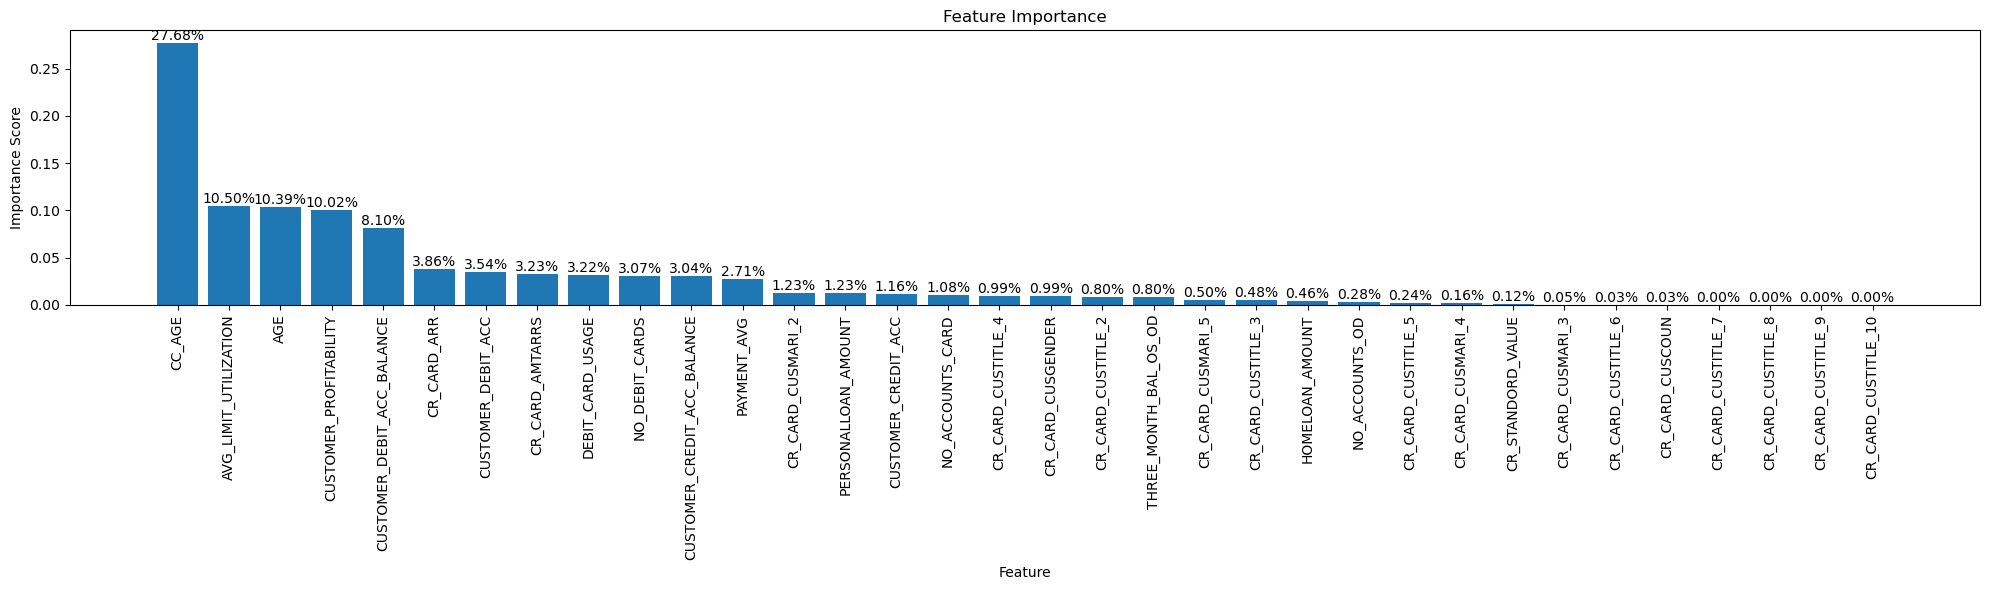

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_resample.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20, 6))
plt.title("Feature Importance")
bars = plt.bar(range(X_train_resample.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_resample.shape[1]), names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()

# Annotate each bar with its importance percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2%}", ha="center", va="bottom")

plt.show()


In [55]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 20, num = 2)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1,50,5)]
# Minimum number of samples required to split a node
min_samples_split = [7,8]
# Minimum number of samples required at each leaf node
min_samples_leaf = [4,6]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [10, 20], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [1, 13, 25, 37, 50], 'min_samples_split': [7, 8], 'min_samples_leaf': [4, 6], 'criterion': ['entropy', 'gini']}


In [57]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=5,cv=4,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train_resample,y_train_resample)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 13, 25, 37, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [4, 6],
                                        'min_samples_split': [7, 8],
                                        'n_estimators': [10, 20]},
                   random_state=100, verbose=2)

In [58]:
rf_randomcv.best_params_

{'n_estimators': 20,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 37,
 'criterion': 'gini'}

In [59]:
rf_randomcv

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 13, 25, 37, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [4, 6],
                                        'min_samples_split': [7, 8],
                                        'n_estimators': [10, 20]},
                   random_state=100, verbose=2)

In [60]:
best_random_grid=rf_randomcv.best_estimator_

In [61]:
rf_randomcv.best_params_

{'n_estimators': 20,
 'min_samples_split': 7,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 37,
 'criterion': 'gini'}

In [62]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2 ],
                         #rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': #[rf_randomcv.best_params_['min_samples_split'] - 2,
                         [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1 ],
                          #rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [37], 'max_features': ['sqrt'], 'min_samples_leaf': [4, 6], 'min_samples_split': [6, 7, 8], 'n_estimators': [-180, -80, 20, 120, 220]}


In [64]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=2,n_jobs=-1,verbose=2)
grid_search.fit(X_train_resample,y_train_resample)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


C:\Users\15342\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\15342\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\15342\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\15342\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 600, in _validate_params
    valid

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [37],
                         'max_features': ['sqrt'], 'min_samples_leaf': [4, 6],
                         'min_samples_split': [6, 7, 8],
                         'n_estimators': [-180, -80, 20, 120, 220]},
             verbose=2)

In [65]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=37, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=220)

In [66]:
best_grid=grid_search.best_estimator_

In [67]:
best_grid

RandomForestClassifier(max_depth=37, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=220)

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(max_depth=37, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=220).fit(X_train_resample,y_train_resample)

In [70]:
# Make predictions on the training set
train_predictions = rf_classifier.predict(X_train_resample)

# Make predictions on the test set
test_predictions = rf_classifier.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
[[41456   721]
 [ 3479 38698]]
0.9502098300021339
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     42177
           1       0.98      0.92      0.95     42177

    accuracy                           0.95     84354
   macro avg       0.95      0.95      0.95     84354
weighted avg       0.95      0.95      0.95     84354

Test Set:
[[  943   954]
 [ 2184 15947]]
0.8433193529059317
              precision    recall  f1-score   support

           0       0.30      0.50      0.38      1897
           1       0.94      0.88      0.91     18131

    accuracy                           0.84     20028
   macro avg       0.62      0.69      0.64     20028
weighted avg       0.88      0.84      0.86     20028



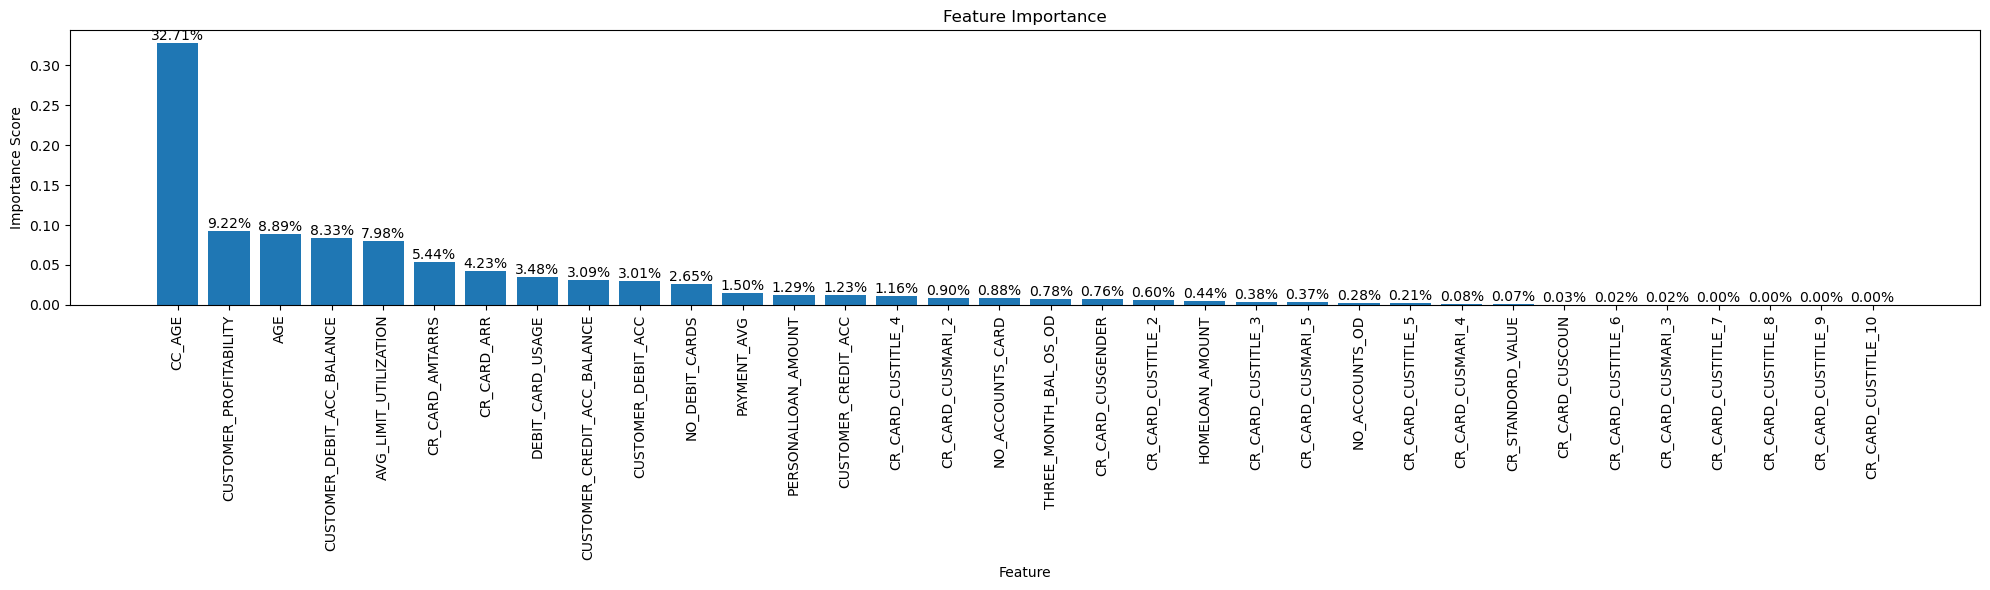

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train_resample.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20, 6))
plt.title("Feature Importance")
bars = plt.bar(range(X_train_resample.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train_resample.shape[1]), names, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.tight_layout()

# Annotate each bar with its importance percentage
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f"{height:.2%}", ha="center", va="bottom")

plt.show()


In [72]:
selected_feat_random_forest = df_mm[['CC_AGE','CUSTOMER_PROFITABILITY','AGE','CUSTOMER_DEBIT_ACC_BALANCE','AVG_LIMIT_UTILIZATION','CR_CARD_AMTARRS','CR_CARD_OVERDUE_STATUS']]

In [73]:
selected_feat_random_forest.head()

CC_AGE  CUSTOMER_PROFITABILITY       AGE  CUSTOMER_DEBIT_ACC_BALANCE  \
0  0.970968                0.542052  0.765432                    0.000000   
1  0.967742                0.542146  0.419753                    0.000025   
2  0.967742                0.542065  0.555556                    0.000000   
3  0.967742                0.542187  0.530864                    0.000021   
4  0.964516                0.542085  0.469136                    0.000076   

   AVG_LIMIT_UTILIZATION  CR_CARD_AMTARRS  CR_CARD_OVERDUE_STATUS  
0               0.016706              1.0                       1  
1               0.002247              1.0                       1  
2               0.029784              1.0                       1  
3               0.010119              1.0                       1  
4               0.093404              1.0                       1

In [74]:
X_R= selected_feat_random_forest.drop('CR_CARD_OVERDUE_STATUS', axis=1)
y_R= selected_feat_random_forest['CR_CARD_OVERDUE_STATUS']
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, test_size=0.3, random_state=42)

In [75]:
# Step 3: Apply SMOTE to the training set

from imblearn.over_sampling import RandomOverSampler
over_sm = RandomOverSampler(random_state=42)
X_train_resample_R, y_train_resample_R = over_sm.fit_resample(X_train_R, y_train_R)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(max_depth=37, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=220).fit(X_train_resample_R,y_train_resample_R)

In [79]:
# Make predictions on the training set
train_predictions = rf_classifier.predict(X_train_resample_R)

# Make predictions on the test set
test_predictions = rf_classifier.predict(X_test_R)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample_R, train_predictions))
print(accuracy_score(y_train_resample_R, train_predictions))
print(classification_report(y_train_resample_R, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
print(confusion_matrix(y_test_R, test_predictions))
print(accuracy_score(y_test_R, test_predictions))
print(classification_report(y_test_R, test_predictions))

Training Set:
[[42144    33]
 [ 1325 40852]]
0.9839011783673566
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     42177
           1       1.00      0.97      0.98     42177

    accuracy                           0.98     84354
   macro avg       0.98      0.98      0.98     84354
weighted avg       0.98      0.98      0.98     84354

Test Set:
[[  726  1171]
 [ 1596 16535]]
0.8618434192131017
              precision    recall  f1-score   support

           0       0.31      0.38      0.34      1897
           1       0.93      0.91      0.92     18131

    accuracy                           0.86     20028
   macro avg       0.62      0.65      0.63     20028
weighted avg       0.88      0.86      0.87     20028



#### xg boost

In [80]:
import xgboost as xgb


In [81]:
xg_boost = xgb.XGBClassifier()
xg_boost.fit(X_train_resample,y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
# Make predictions on the training set
train_predictions = xg_boost.predict(X_train_resample)

# Make predictions on the test set
test_predictions = xg_boost.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
[[39027  3150]
 [ 7737 34440]]
0.8709367664841027
              precision    recall  f1-score   support

           0       0.83      0.93      0.88     42177
           1       0.92      0.82      0.86     42177

    accuracy                           0.87     84354
   macro avg       0.88      0.87      0.87     84354
weighted avg       0.88      0.87      0.87     84354

Test Set:
[[ 1231   666]
 [ 3863 14268]]
0.7738665867785101
              precision    recall  f1-score   support

           0       0.24      0.65      0.35      1897
           1       0.96      0.79      0.86     18131

    accuracy                           0.77     20028
   macro avg       0.60      0.72      0.61     20028
weighted avg       0.89      0.77      0.81     20028



In [83]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300],  # Number of boosting rounds
    'max_depth': [5],            # Maximum depth of a tree
    'learning_rate': [0.01],# Learning rate
    #'subsample': [0.7],      # Subsample ratio of the training instance
    #'colsample_bytree': [0.7, 0.8, 0.9]# Subsample ratio of columns when constructing each tree
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xg_boost, param_grid=param_grid, cv=2, n_jobs=-1, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_estimator = grid_search.best_estimator_
best_estimator


Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [96]:
xg_boost = xgb.XGBClassifier(learning_rate= 0.16, max_depth =7, n_estimators = 500, subsample=0.8, colsample_bytree=0.8)
xg_boost.fit(X_train_resample,y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.16, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [97]:
# Make predictions on the training set
train_predictions = xg_boost.predict(X_train_resample)

# Make predictions on the test set
test_predictions = xg_boost.predict(X_test)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample, train_predictions))
print(accuracy_score(y_train_resample, train_predictions))
print(classification_report(y_train_resample, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
print(confusion_matrix(y_test, test_predictions))
print(accuracy_score(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

Training Set:
[[42045   132]
 [ 2081 40096]]
0.9737653223320767
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     42177
           1       1.00      0.95      0.97     42177

    accuracy                           0.97     84354
   macro avg       0.97      0.97      0.97     84354
weighted avg       0.97      0.97      0.97     84354

Test Set:
[[  770  1127]
 [ 1873 16258]]
0.8502097064110246
              precision    recall  f1-score   support

           0       0.29      0.41      0.34      1897
           1       0.94      0.90      0.92     18131

    accuracy                           0.85     20028
   macro avg       0.61      0.65      0.63     20028
weighted avg       0.87      0.85      0.86     20028



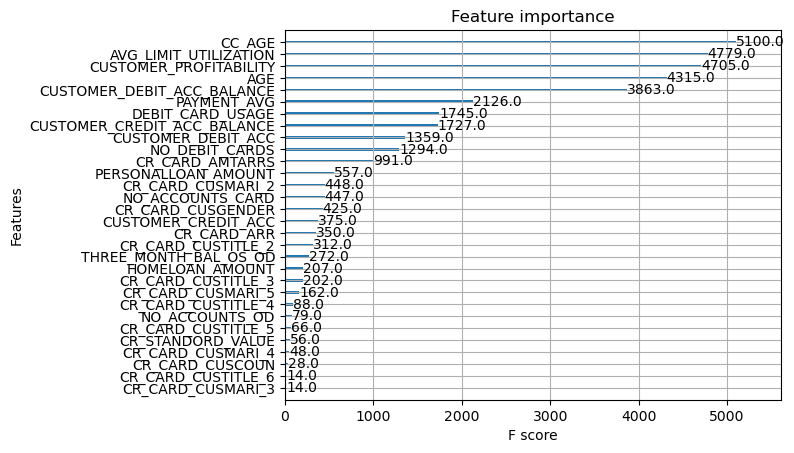

In [98]:
from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from matplotlib import pyplot

# fit model no training data

# plot feature importance
plot_importance(xg_boost)
pyplot.show()


In [87]:
selected_feat_xg_boost = df_mm[['CC_AGE','AGE','AVG_LIMIT_UTILIZATION','CUSTOMER_PROFITABILITY','CUSTOMER_DEBIT_ACC_BALANCE',
                                'PAYMENT_AVG','CR_CARD_OVERDUE_STATUS']]

In [88]:
selected_feat_xg_boost.head()

CC_AGE       AGE  AVG_LIMIT_UTILIZATION  CUSTOMER_PROFITABILITY  \
0  0.970968  0.765432               0.016706                0.542052   
1  0.967742  0.419753               0.002247                0.542146   
2  0.967742  0.555556               0.029784                0.542065   
3  0.967742  0.530864               0.010119                0.542187   
4  0.964516  0.469136               0.093404                0.542085   

   CUSTOMER_DEBIT_ACC_BALANCE  PAYMENT_AVG  CR_CARD_OVERDUE_STATUS  
0                    0.000000     0.790899                       1  
1                    0.000025     0.790899                       1  
2                    0.000000     0.790909                       1  
3                    0.000021     0.790899                       1  
4                    0.000076     0.790899                       1

In [89]:
X_B= selected_feat_xg_boost.drop('CR_CARD_OVERDUE_STATUS', axis=1)
y_B= selected_feat_xg_boost['CR_CARD_OVERDUE_STATUS']
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X_B, y_B, test_size=0.3, random_state=42)

In [90]:
from imblearn.over_sampling import RandomOverSampler
over_sm_B = RandomOverSampler(random_state=42)
X_train_resample_B, y_train_resample_B = over_sm_B.fit_resample(X_train_B, y_train_B)

In [91]:
xg_boost = xgb.XGBClassifier()
xg_boost.fit(X_train_resample_B,y_train_resample_B)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [92]:
# Make predictions on the training set
train_predictions = xg_boost.predict(X_train_resample_B)

# Make predictions on the test set
test_predictions = xg_boost.predict(X_test_B)

# Print confusion matrix, accuracy, and classification report for training set
print("Training Set:")
print(confusion_matrix(y_train_resample_B, train_predictions))
print(accuracy_score(y_train_resample_B, train_predictions))
print(classification_report(y_train_resample_B, train_predictions))

# Print confusion matrix, accuracy, and classification report for test set
print("Test Set:")
print(confusion_matrix(y_test_B, test_predictions))
print(accuracy_score(y_test_B, test_predictions))
print(classification_report(y_test_B, test_predictions))

Training Set:
[[39528  2649]
 [ 8599 33578]]
0.8666571828247623
              precision    recall  f1-score   support

           0       0.82      0.94      0.88     42177
           1       0.93      0.80      0.86     42177

    accuracy                           0.87     84354
   macro avg       0.87      0.87      0.87     84354
weighted avg       0.87      0.87      0.87     84354

Test Set:
[[ 1218   679]
 [ 4239 13892]]
0.7544437787098063
              precision    recall  f1-score   support

           0       0.22      0.64      0.33      1897
           1       0.95      0.77      0.85     18131

    accuracy                           0.75     20028
   macro avg       0.59      0.70      0.59     20028
weighted avg       0.88      0.75      0.80     20028

